In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

import cv2

import glob
import csv

# NOTE: change the home directory name here
WAD_TRAIN_COLOR = "/home/stevenzc/.kaggle/competitions/cvpr-2018-autonomous-driving/train_color/"
WAD_TRAIN_LABEL = "/home/stevenzc/.kaggle/competitions/cvpr-2018-autonomous-driving/train_label/"

im_files = glob.glob(os.path.join(WAD_TRAIN_LABEL, '*.jpg'))
label_files = glob.glob(os.path.join(WAD_TRAIN_LABEL, '*.png'))

In [16]:
label_file = label_files[5]
label_im = skimage.io.imread(label_file) # skimage read works properly, don't use cv2

In [17]:
instances = np.unique(label_im)

In [18]:
instances

array([  255, 33000, 33001, 33002, 33003, 33004, 33005, 36000, 36001,
       38000, 65535], dtype=uint16)

In [21]:
wad_to_ours = {
    33: 1,
    34: 2,
    35: 3,
    36: 4,
    38: 5,
    39: 6,
    40: 7
}

In [24]:
def get_masks(label_im):
    """Return lists of binary masks and ids corresponding to instances.
    
    Params:
        label_im - label mask image from WAD as 2D numpy array
    
    Returns:
        ids - list of ids corresponding to instance masks
        masks - list of binary masks, each corresponding to one instance
    """
    instances = np.unique(label_im)
    ids = []
    masks = []
    
    wad_to_ours = {
        33: 1,
        34: 2,
        35: 3,
        36: 4,
        38: 5,
        39: 6,
        40: 7
    }
    
    for instance in instances:
        if instance != 255 and instance != 65535:
            wad_id = int(instance / 1000)
            our_id = wad_to_ours[wad_id]
            mask = (label_im == instance)
            ids.append(our_id)
            masks.append(mask)
    
    return (ids, masks)

In [35]:
label_file = label_files[1]
label_im = skimage.io.imread(label_file)

ids, masks = get_masks(label_im)

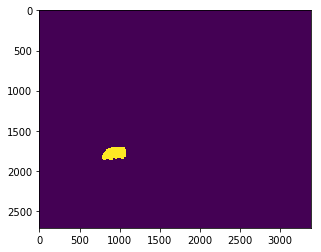

In [37]:
plt.imshow(masks[0])